# Exploratory Data Analysis on job salaries in Data Science

# About Dataset

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year with the following possible values: EN = Entry-level / Junior; MI = Mid-level / Intermediate; SE = Senior-level / Expert; EX = Executive-level / Director.

employment_type: The type of employement for the role: PT = Part-time; FT = Full-time; CT = Contract; FL = Freelance.

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code(Alpha-2 code).

remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 = No remote work (less than 20%); 50 = Partially remote; 100 = Fully remote (more than 80%).

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code(Alpha-2 code).

company_size: The average number of people that worked for the company during the year: S = less than 50 employees (small); M = 50 to 250 employees (medium); L = more than 250 employees (large).

# Import libraries

In [57]:
# Import the neccesary libraries.
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Read the dataset

In [58]:
# Read and load the dataset
data = pd.read_csv("ds_salaries.csv")

# Get the first five rows of the dataset.
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [59]:
# Get the last five rows of the dataset.
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


# Data Exploration

In [60]:
# get dataframe dimensions
print("Database dimension     :",data.shape)
print("Database size          :",data.size)

# get info about the dataframe (columns,entries,datatype etc...)
data.info()     

# describe the dataframe and get statistics
data.describe()

Database dimension     : (607, 11)
Database size          : 6677
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


This dataset contains 607 rows and 11 columns.

In [61]:
# Get the columns of the dataset.
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Data Cleaning

# Drop columns which are not required

In [62]:
# We will drop column salaray and salary_currency, as we have column salary_in_usd where salary in all the currencies are converted to USD.
data.drop(['salary_currency','salary'],axis=1,inplace=True)

In [63]:
# C heck to see the total number of columns left after removing some columns.
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [64]:
# Check the shape of the new dataset after removing some columns.
data.shape

(607, 9)

The new dataset contains 607 rows and 9 columns.

# Replace feature values for better understanding

In [65]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [66]:
data['experience_level'] = data['experience_level'].map({'MI' : 'MID', 'SE': 'SENIOR', 'EN' : 'ENTRY', 'EX': 'EXPERT'})
data['employment_type'] = data['employment_type'].map({ 'PT':'Part-time', 'FT' : 'Full-time', 'CT' : 'Contract', 'FL' : 'Freelance'})
data['remote_ratio'] = data['remote_ratio'].map({0: 'No Remote',50: 'Partially Remote',100: 'Fully Remote'})
data['company_size'] = data['company_size'].map({'L': 'Large','S':'Small','M':'Medium'})

# Check for missing vaues

In [67]:
# Check if there are any missing values.
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no any missing values, so we can continue with data analysis process.

# Check for duplicates

In [68]:
# Check if there are any duplicates.
data.duplicated().sum()

42

There are 42 duplicate records.

In [69]:
# Remove duplicate records
data.drop_duplicates(inplace=True)

In [70]:
# Shape of data after removing duplicates
data.shape

(565, 9)

The new dataset contains 607 rows and 9 columns aftrer removing duplicates.

# Univariate Analysis

# Salary

In [71]:
# Lets check target variable i.e. salary_in_usd
data['salary_in_usd'].describe()

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

Plot the figure to check if there are any Outliers

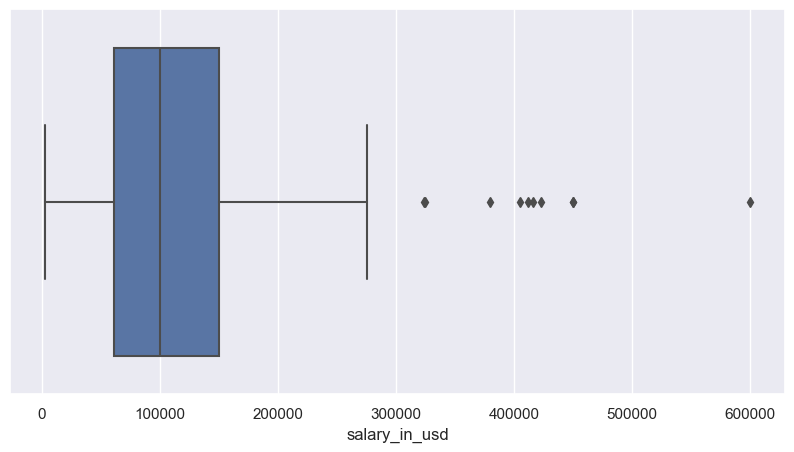

In [72]:
# Plot the figure for salary to see if there are any outliers.
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='salary_in_usd')
plt.show()

So salary above 300000 can be considered as outliers.

In [73]:
# Lets remove records with outliers

data_outliers = data[data['salary_in_usd'] > 300000]
data_outliers.shape

(10, 9)

In [74]:
data = data[~(data['salary_in_usd'] > 300000)]
data.shape

(555, 9)

In [75]:
# Below function will plot countplot for the provided feature
def count_plot(feature):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=data,x=feature)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
    plt.xticks(rotation=90)
    plt.show()

# Work Year

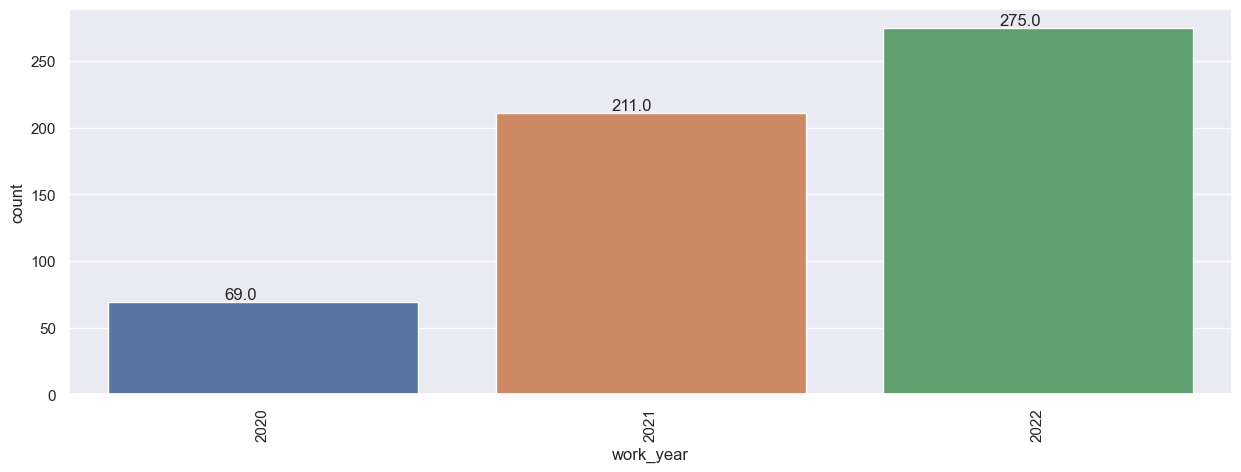

In [76]:
# Coutplot for work_year
count_plot('work_year')

1. Most of the records in the data contains salaries for year 2022.
2. There are less records containing salary informaton for year 2020.

# Experience level

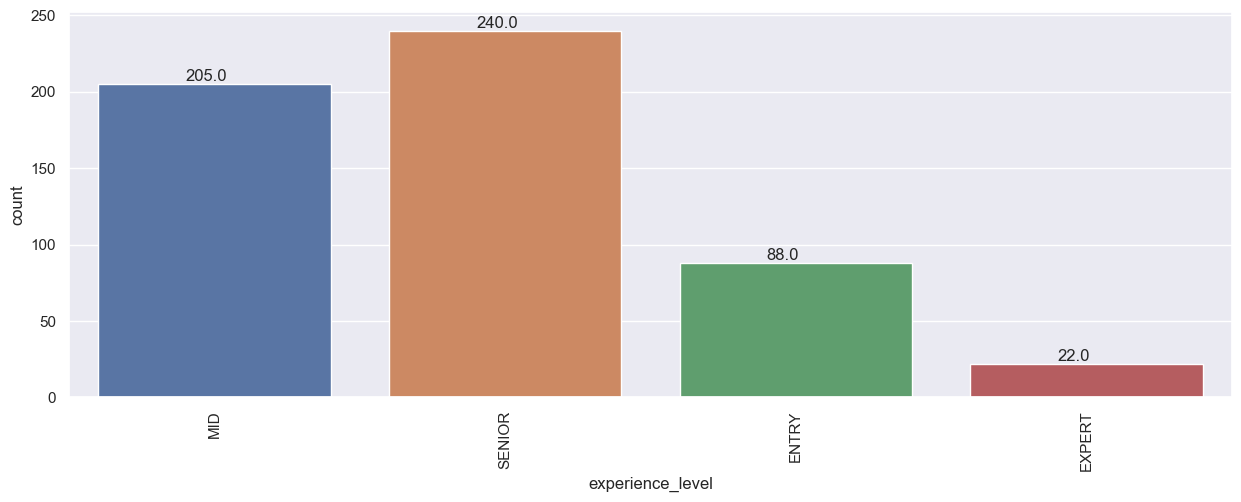

In [77]:
# Countplot for experience_level
count_plot('experience_level')

1. Most of the records are for experience level SE (senior).
2. There are very less records for experience level EX (expert).

# Employment Type

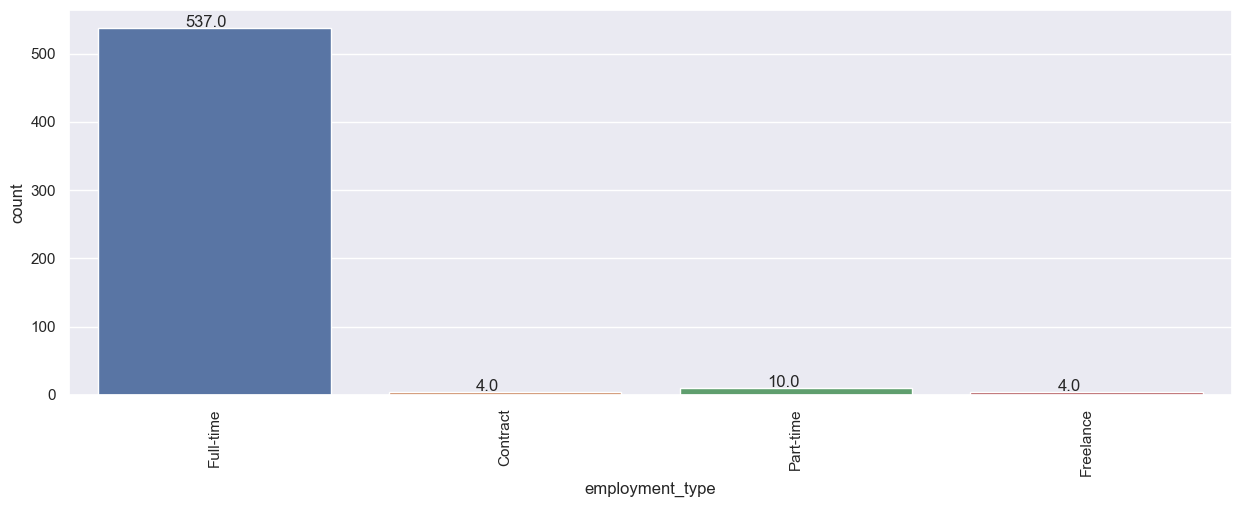

In [78]:
# Countplot for employment_type
count_plot('employment_type')

Most of the records are for full time employees.

# Job Title

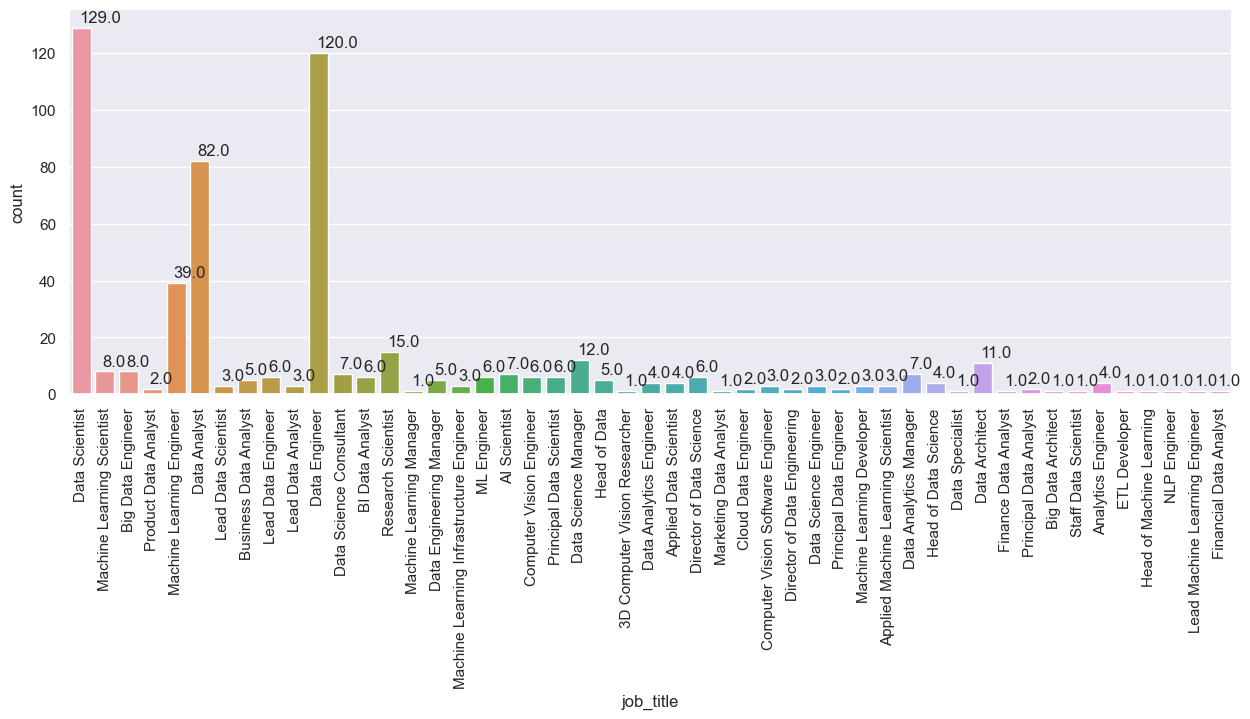

In [79]:
# Countplot for ob_title
count_plot('job_title')

Most popular job titles are Data Scientist,Data Engineer, Data Analyst and Machine learning Engineer.

# Employee residence

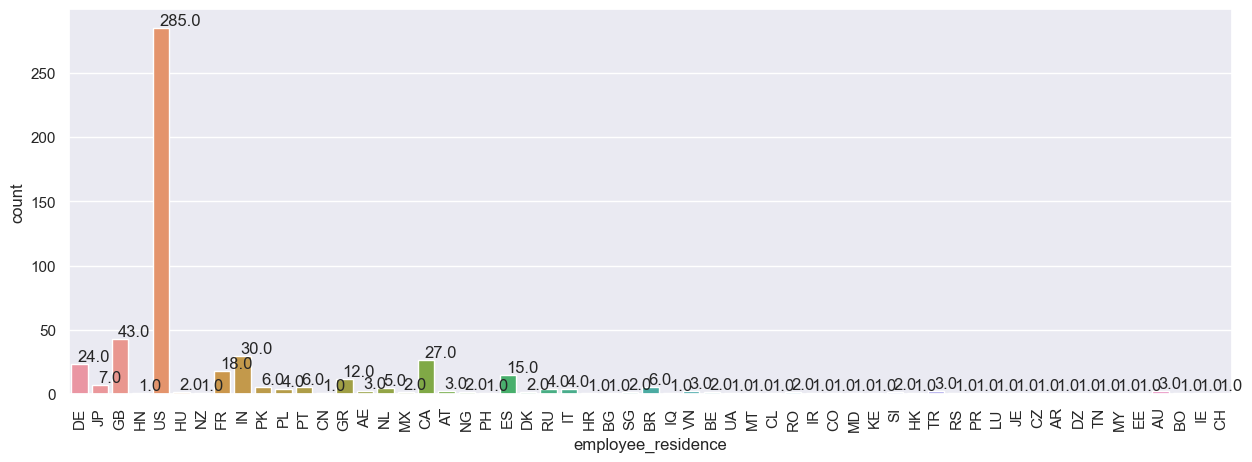

In [80]:
# Countplot for employee_residence
count_plot('employee_residence')

Most of the employees are from US.

# Company Location

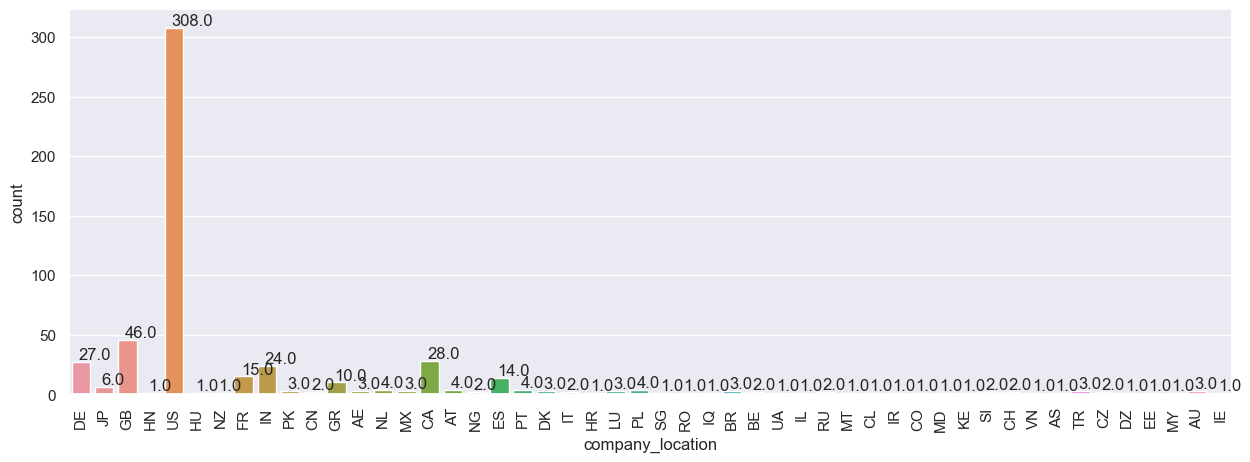

In [81]:
#countplot for company_location
count_plot('company_location')

Most companies are located in the US.

# Company size

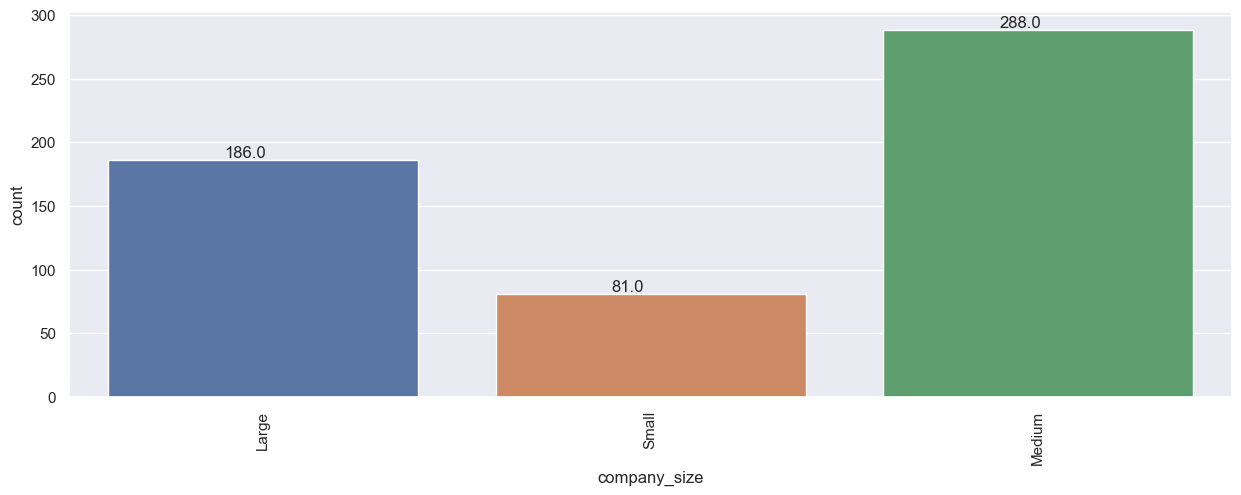

In [82]:
# Countplot for company_size
count_plot('company_size')

Most company sizes are medium.

# Remote Ratio

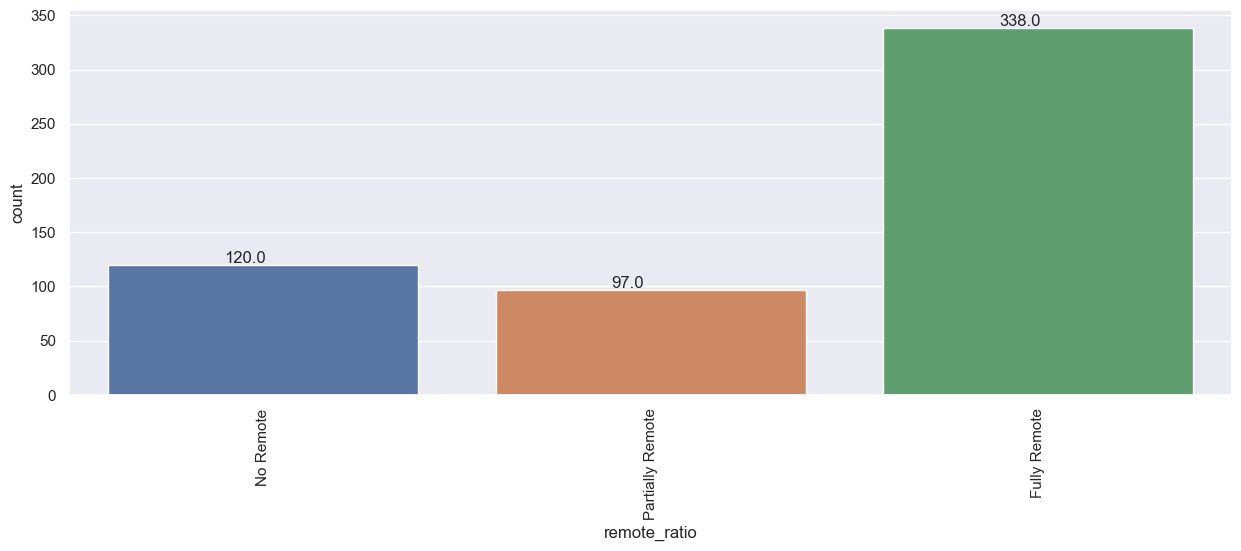

In [83]:
# Countplot for remote_ratio
count_plot('remote_ratio')

Most emoplyees are working as fully remote.

# Multivariate Analysis

Lets try to answer below questions:

1. Which job title earns highest salary ?
2. What is the average salary for each experience level ?
3. What is the average salary for company size Large, Small and Medium ?
4. Does people working full time earns more than contract base employees ?
5. Is salary less for employee woking remotely than who comes to office ?
6. Which country pays more to the employees ?
7. What is the highest earning job in highest paying countries ?
8. What is the highest earning job titles working at expert level ?
9. What is the highest earning job titles working at senioir level ?
10. Has salary of data science job roles increased over the passing years ?
11. What is the trend of salary paid by medium size company over the passing years ?
12. What is the trend of salary paid by large size company over the passing years ?
13. What is the trend of salary paid by medium size company over the passing years ?


Defined few customised plotting funcions which can be used for multivariate analysis.

In [84]:
# Function to plot box plot
def box_plot(x,y,data,title):
    plt.figure(figsize=(10,8))
    sals_mean = data.groupby([x])[y].mean();
    
    #print(sals)
    ax = sns.boxplot(data=data,y=y,x = x)
    
    vertical_offset_mean = data[y].median() * 0.05 # offset from median for display
    vertical_offset_max = data[y].max() * 0.05
    
    for i,xtick in enumerate(ax.get_xticklabels(which='major')):
        #print(xtick.get_text())
        ax.text(i,sals_mean[xtick.get_text()] + vertical_offset_mean,sals_mean[xtick.get_text()], 
             horizontalalignment='center',size='small',color='w',weight='semibold')
    ax.set_title(title)    
    plt.show()

In [85]:
# Function to plot bar plot
def bar_plot(feature,data,title):
    data = data.groupby(feature)['salary_in_usd'].mean()
    plt.figure(figsize=(12,16))
    ax = sns.barplot(x=data.values, y=data.index,color='pink')
    for i, v in enumerate(data.values):
        ax.annotate(str(v), xy=(v,i), va='center')
    ax.set_xlabel("salary")
    ax.set_ylabel(feature)
    ax.set_title(title)
    plt.show()

1. Which job title earns highest salary?

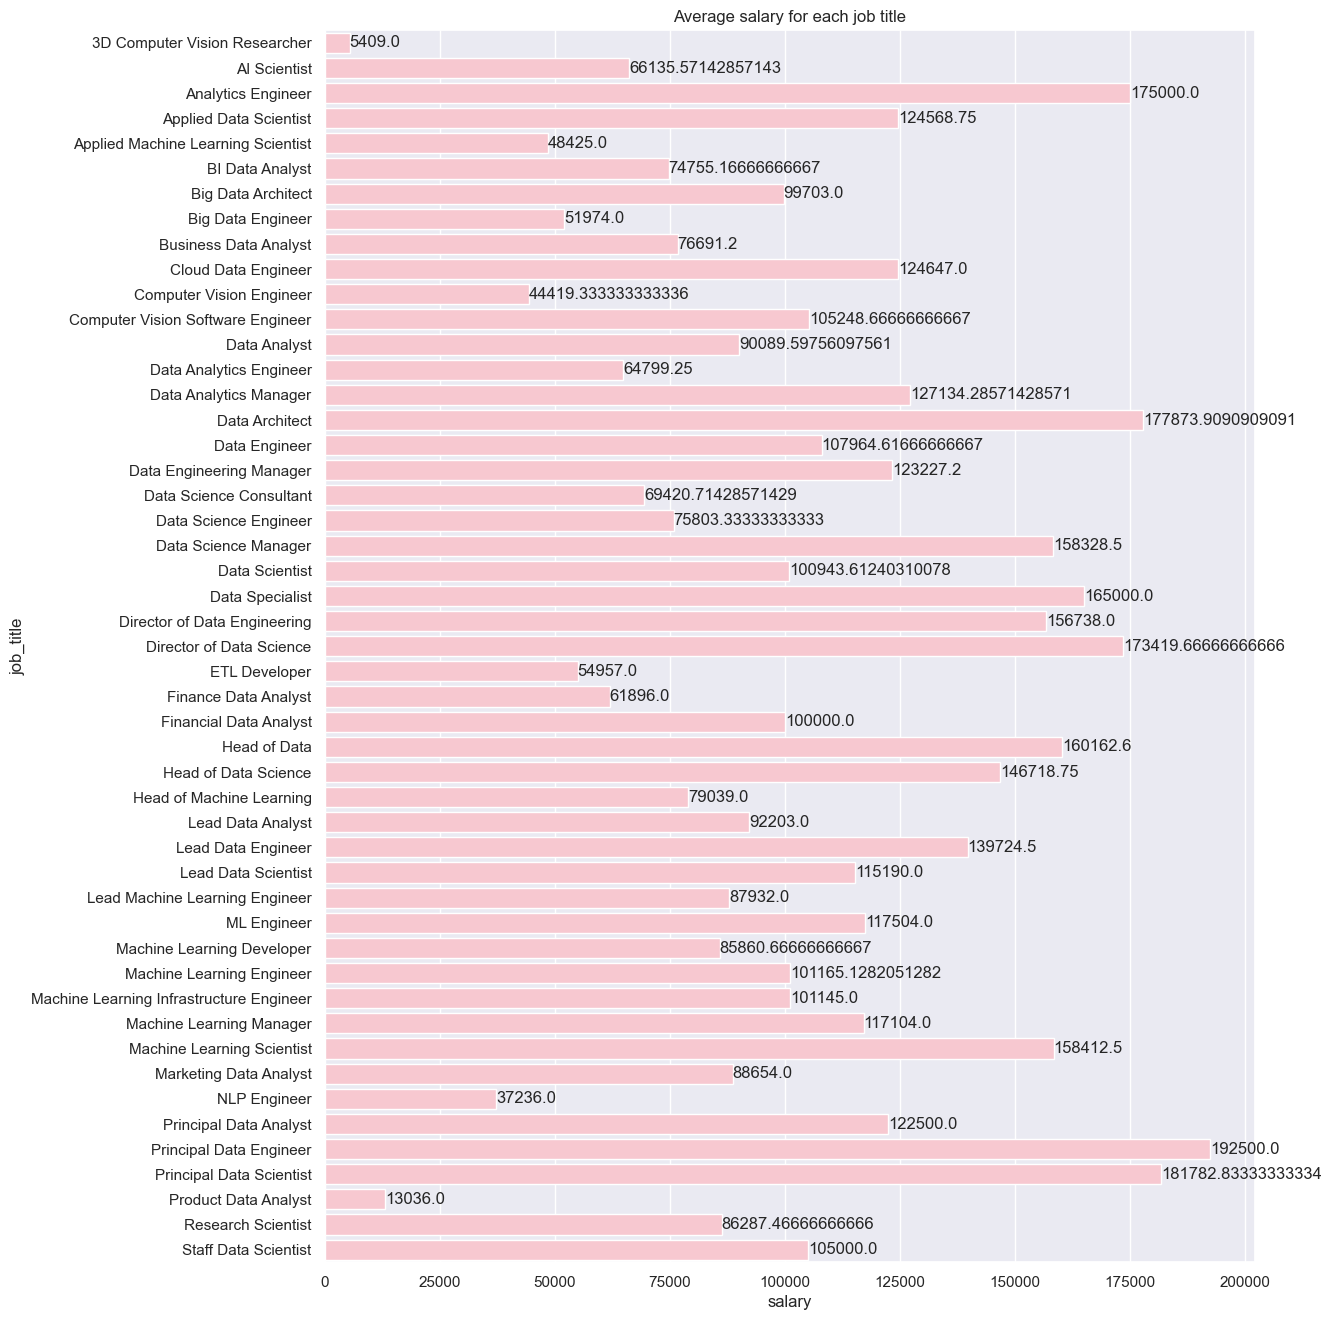

In [86]:
bar_plot('job_title',data,'Average salary for each job title')

From the above figure we can see that top five highest earning jobs are Principal Data Engineer, Principal Data Scientist, Data Architect, Analytics Engineer and Director of Data Science.

2. What is the average salary for each experience level?

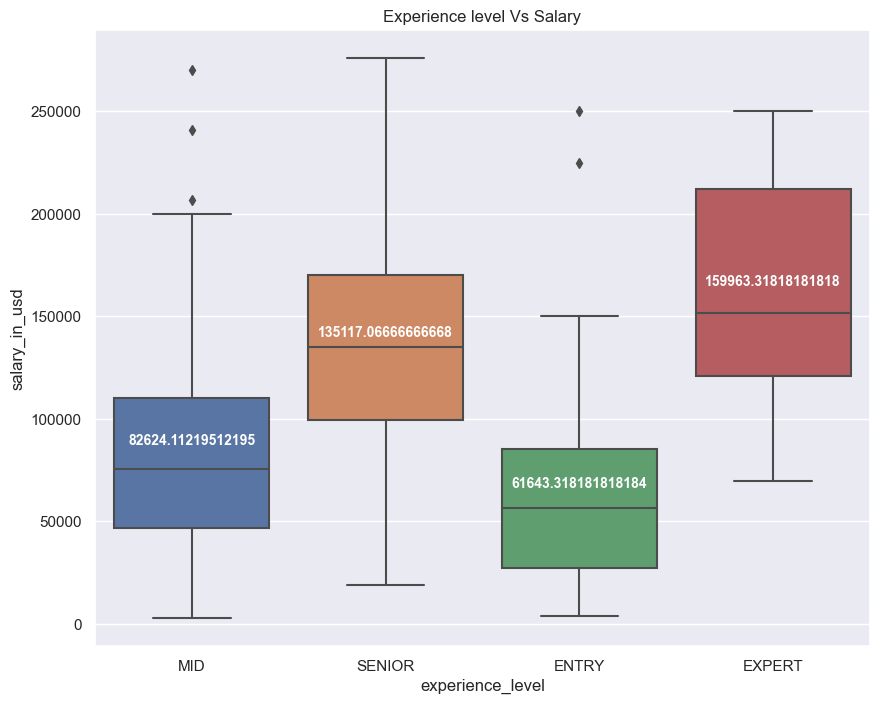

In [87]:
# Average salary for each experience level.
box_plot('experience_level','salary_in_usd',data,'Experience level Vs Salary')

Average salary of expert is more than other experience levels.

3. What is the average salary for company size Large, Small and Medium?

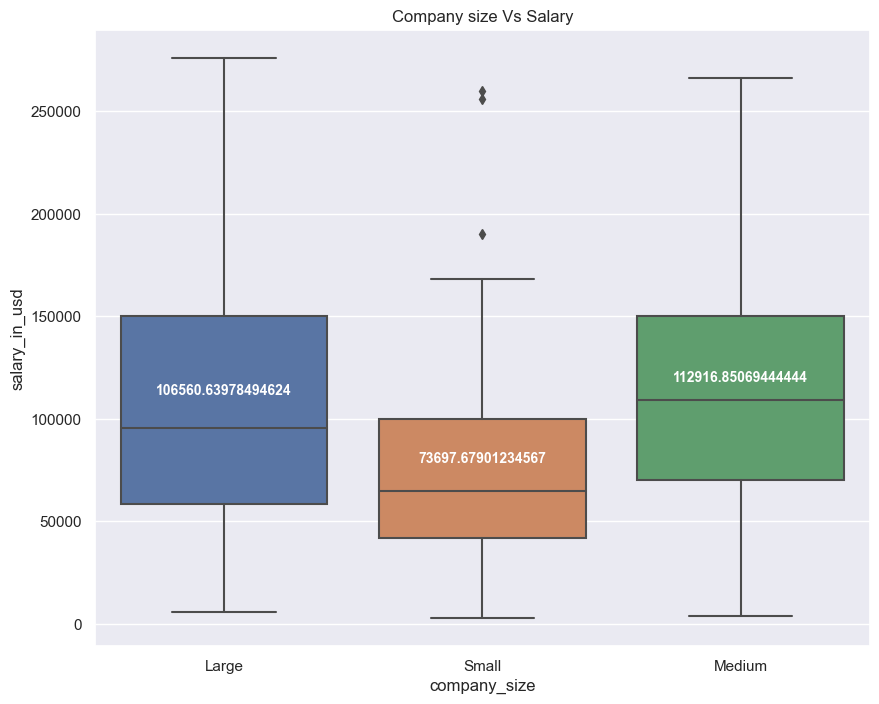

In [88]:
box_plot('company_size','salary_in_usd',data, 'Company size Vs Salary')

On an average employees in medium size company earns more than large size company.

4. Does people working full time earns more than contract base employees?

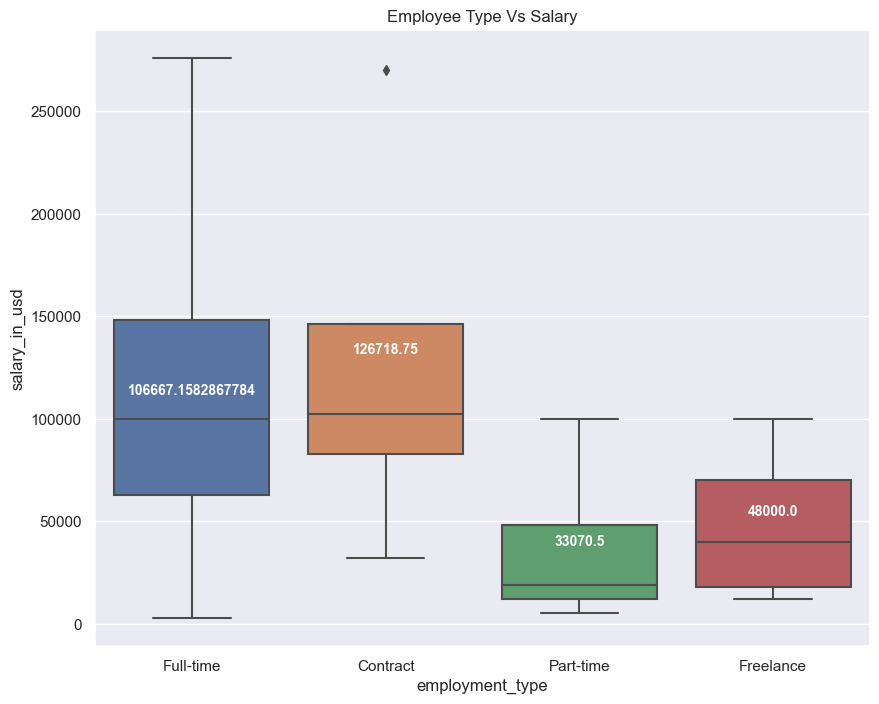

In [89]:
box_plot('employment_type','salary_in_usd',data, 'Employee Type Vs Salary')

From the above figure we can see that salary of contract base employee is more than full time employee. But it might be impacted by outlier.

In [90]:
# Lets check outlier point
data[(data['employment_type'] =='Contract') & (data['salary_in_usd'] > 250000) ]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2021,MID,Contract,ML Engineer,270000,US,Fully Remote,US,Large


In [91]:
# Removing the outlier point from data 
data = data[~((data['employment_type'] =='Contract') & (data['salary_in_usd'] > 250000) )]

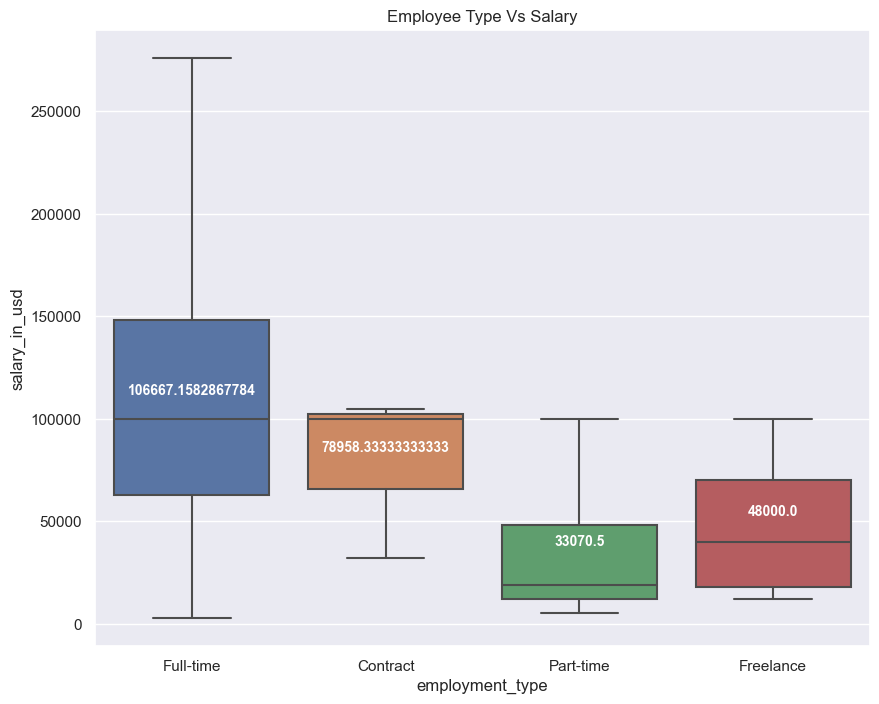

In [92]:
# Plot after removing outliers
box_plot('employment_type','salary_in_usd',data, 'Employee Type Vs Salary' )

Full time employees earns more than contract base employees.

5. Is salary less for employee woking remotely than who comes to office?

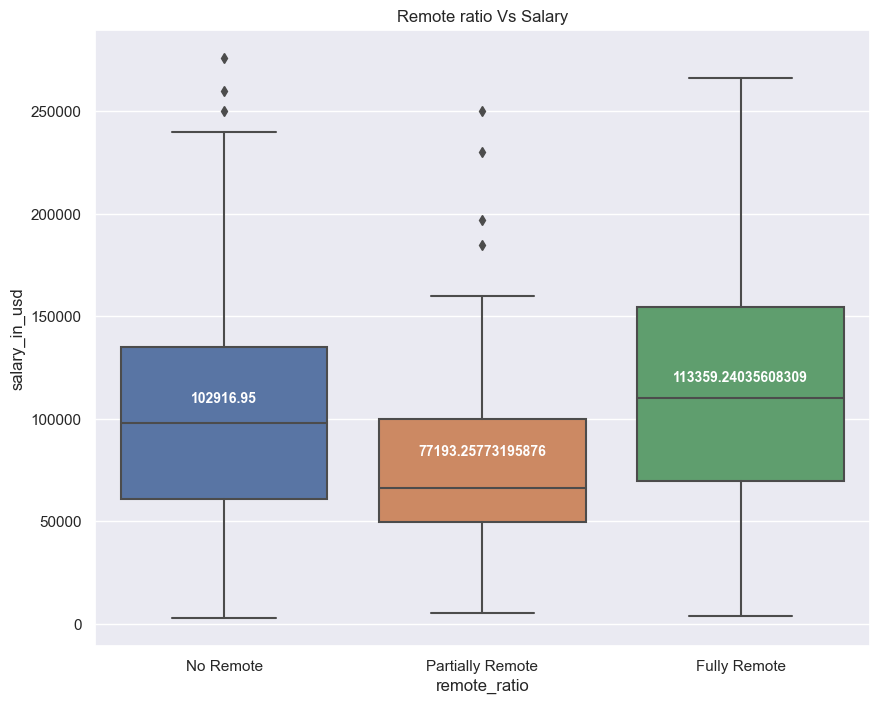

In [93]:
box_plot('remote_ratio','salary_in_usd',data, 'Remote ratio Vs Salary')

On an average people working as on remote mode earns more.

6. Which country pays more to the employees?

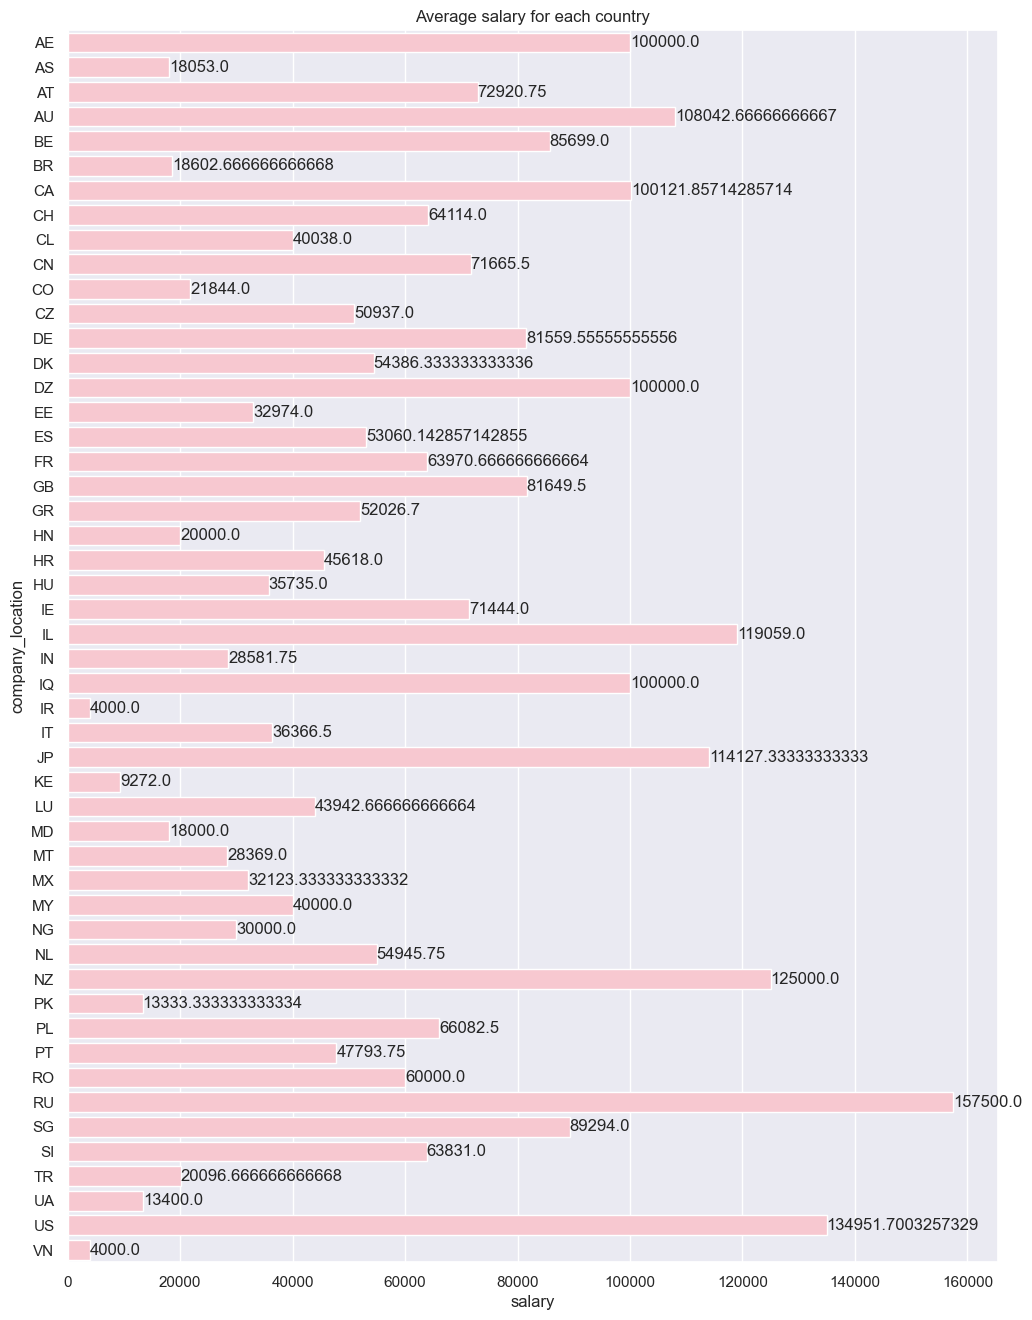

In [94]:
bar_plot('company_location',data,'Average salary for each country')

Top two highest paying countries are Russia and US.

7. What is the highest earning job in highest paying countries?

In [95]:
# Lets group the data by country Russia and US
data_RU = data[data['company_location']=='RU']
data_US = data[data['company_location']=='US']

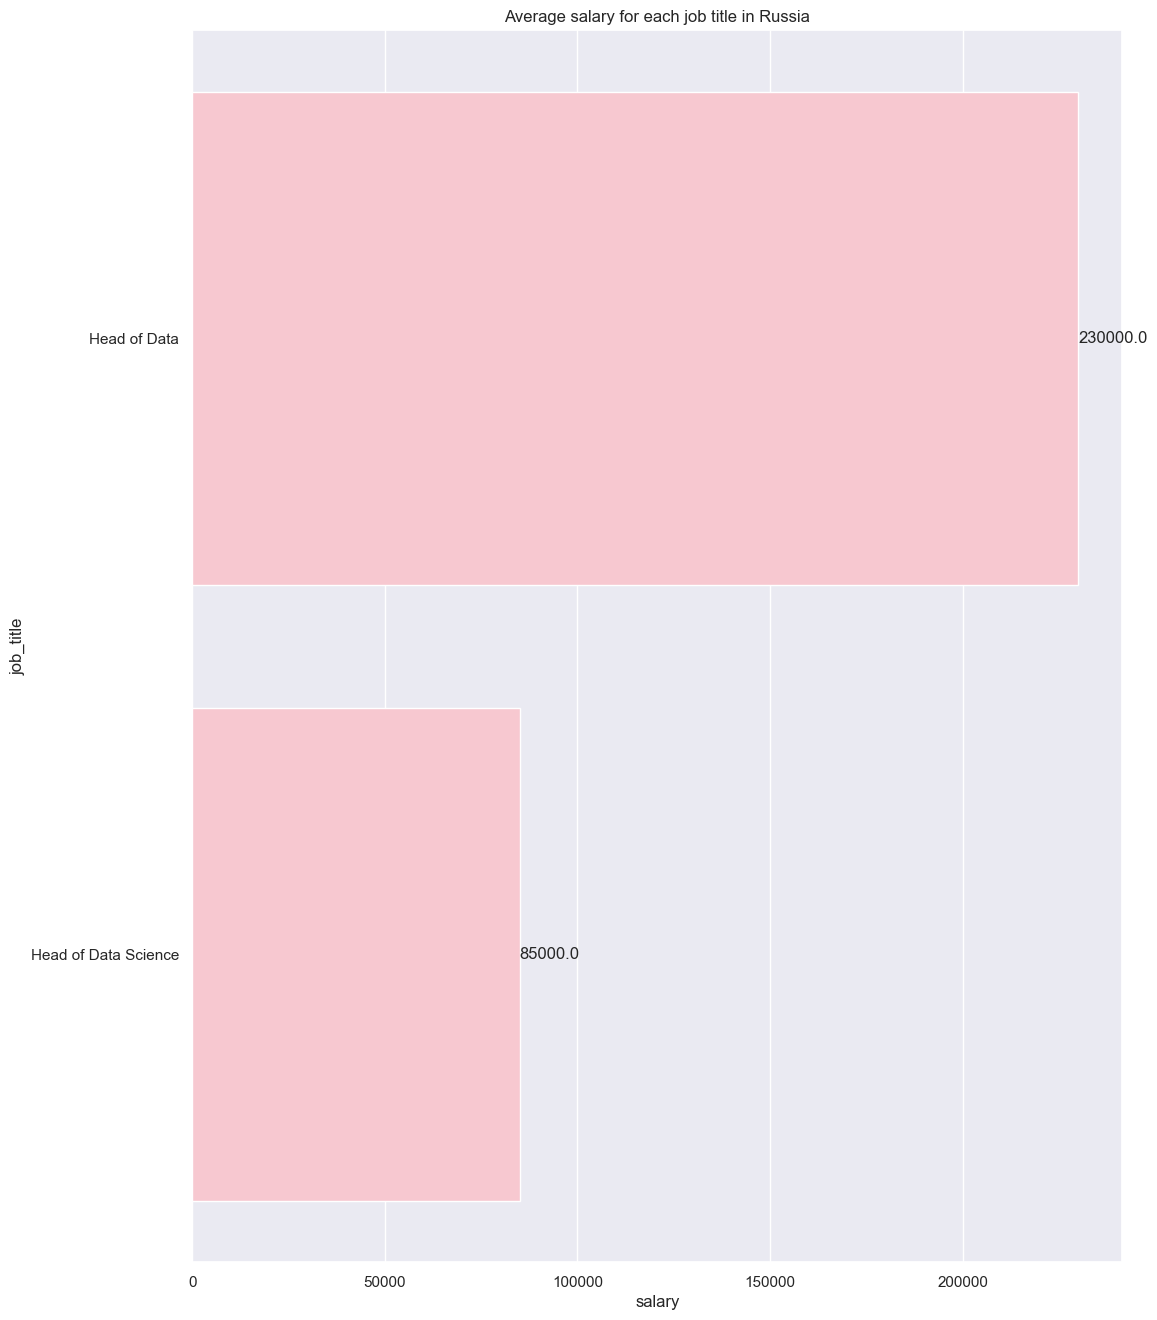

In [96]:
# Plot job titles in Russia
bar_plot('job_title',data_RU,"Average salary for each job title in Russia")

Highest earning job in Russia is Head of Data.

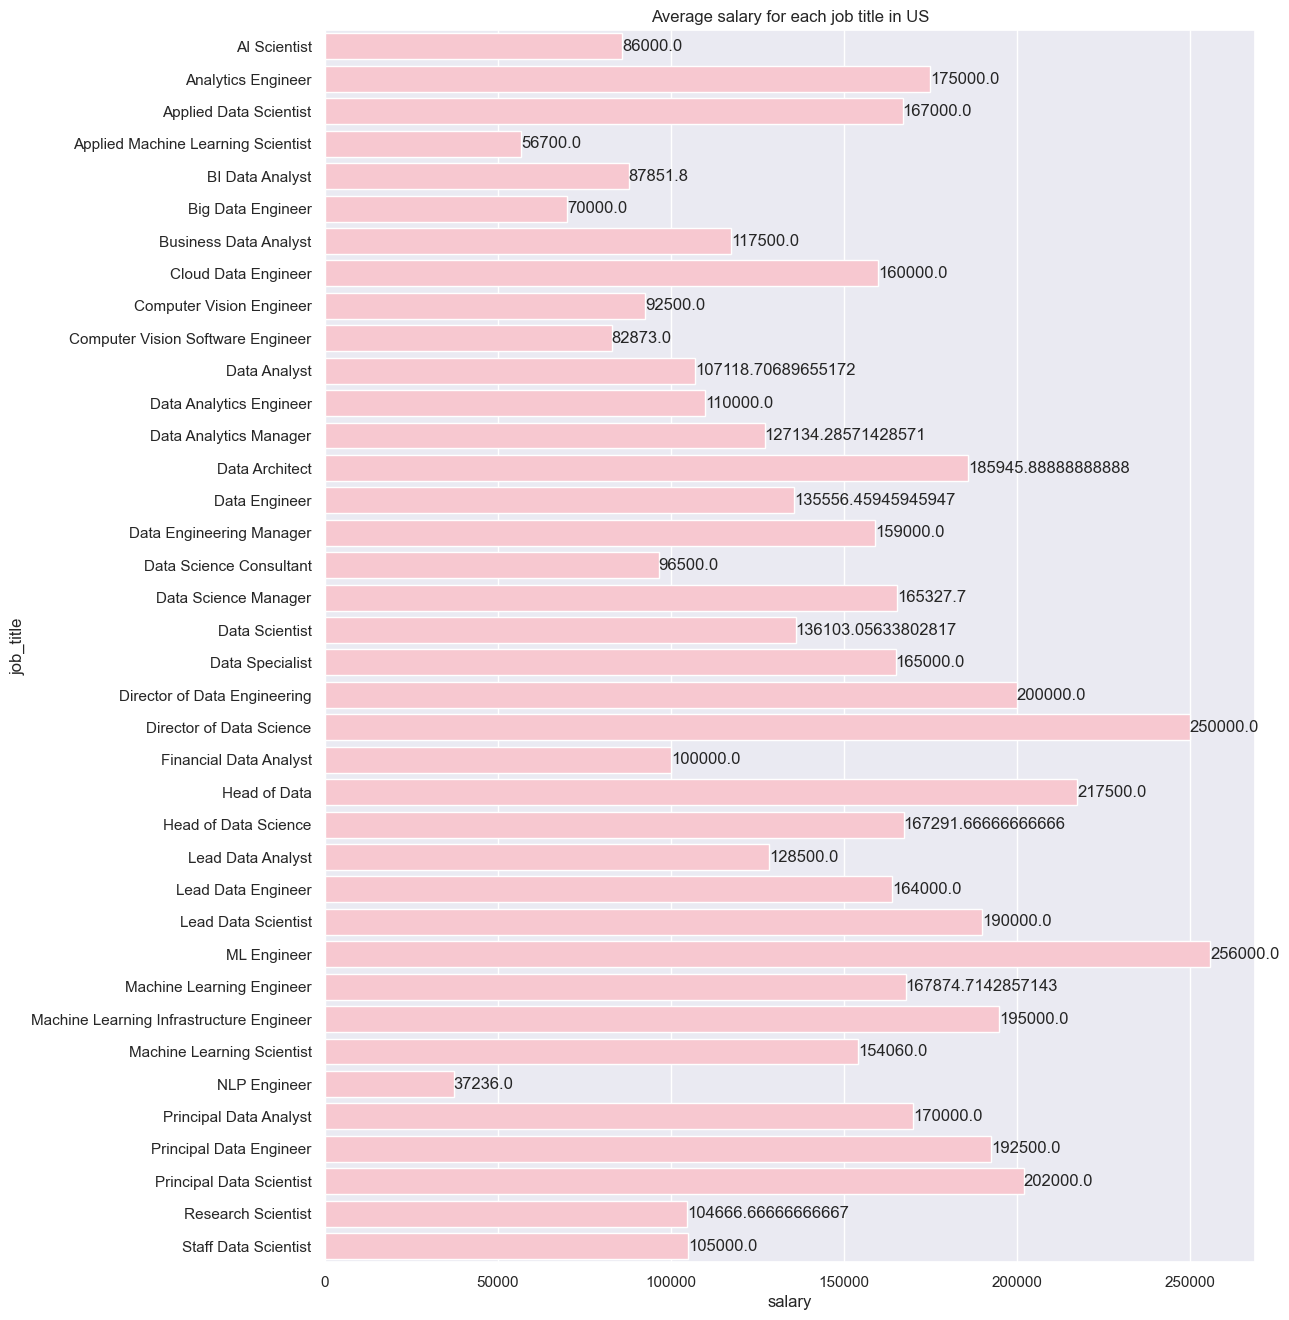

In [97]:
# Plot job titles in US
bar_plot('job_title', data_US,'Average salary for each job title in US')

Highest earning job in US is ML Engineer and Director of Data Science.

8. What is the average salary for highest earning job titles working at expert level?

In [98]:
# Get the data for expert level roles
data_expert = data[data['experience_level']=='EXPERT']

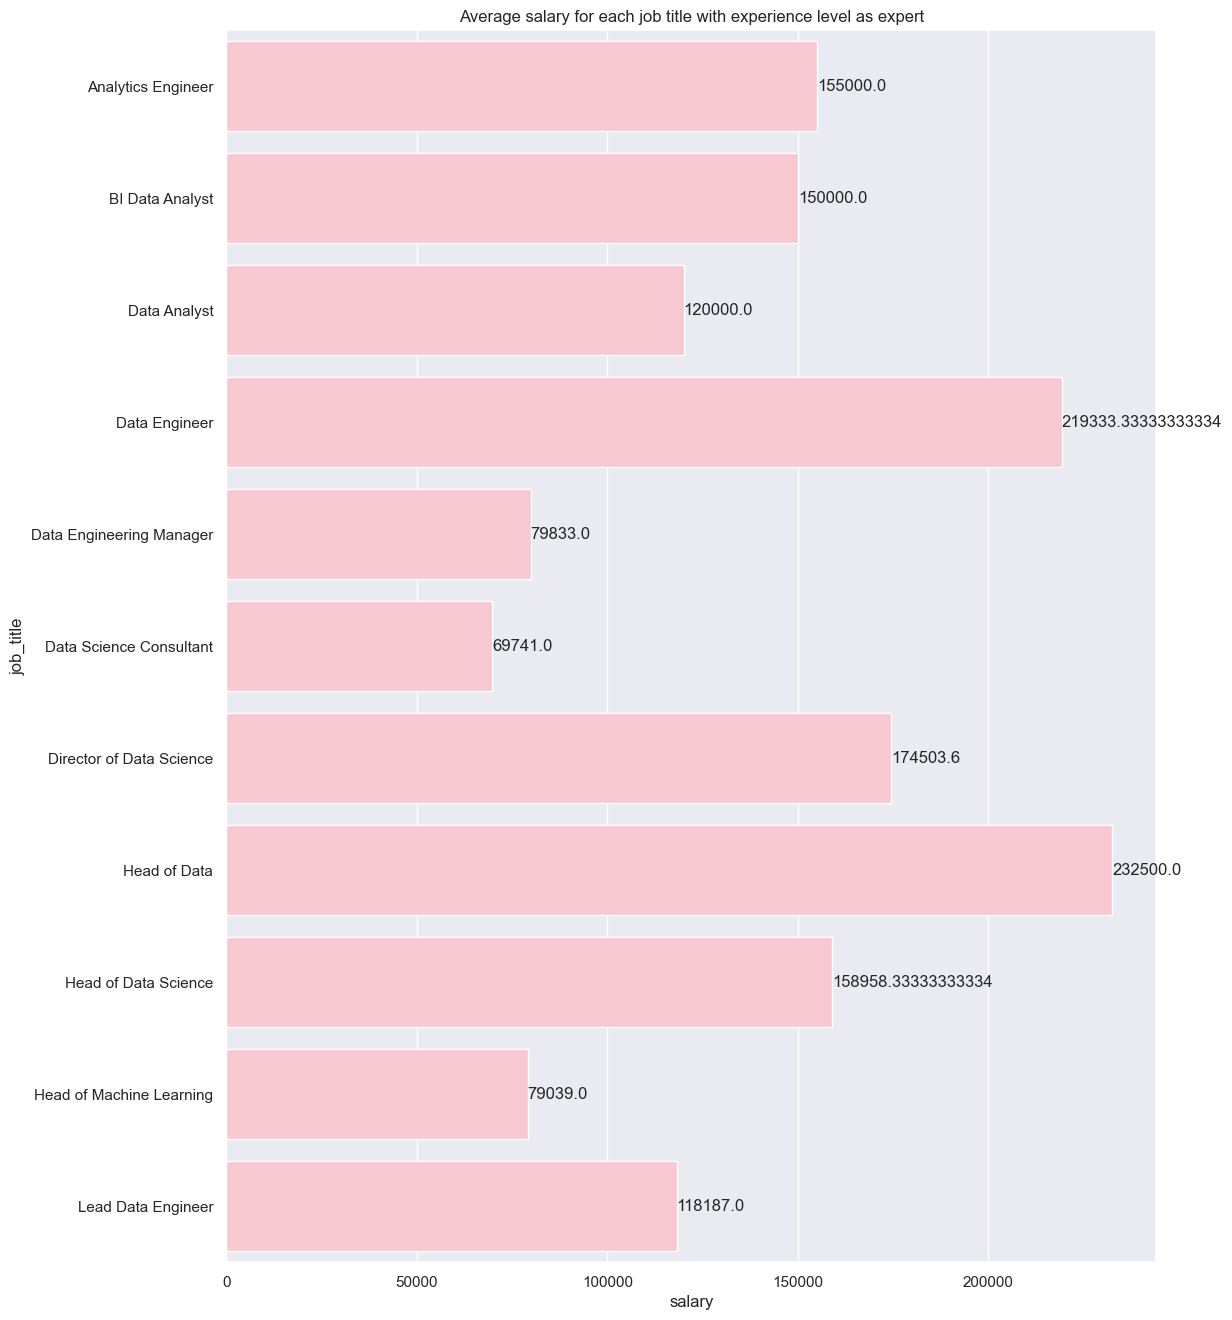

In [99]:
# Plot job titles working with experience level as expert
bar_plot('job_title',data_expert,"Average salary for each job title with experience level as expert")


Head of Data and Data Engineer working at expert level earns more than any other job at expert level.

9. What is the highest earning job titles working at senior level?

In [101]:
# Get the dta for SENIOR level roles
data_senior = data[data['experience_level']=='SENIOR']

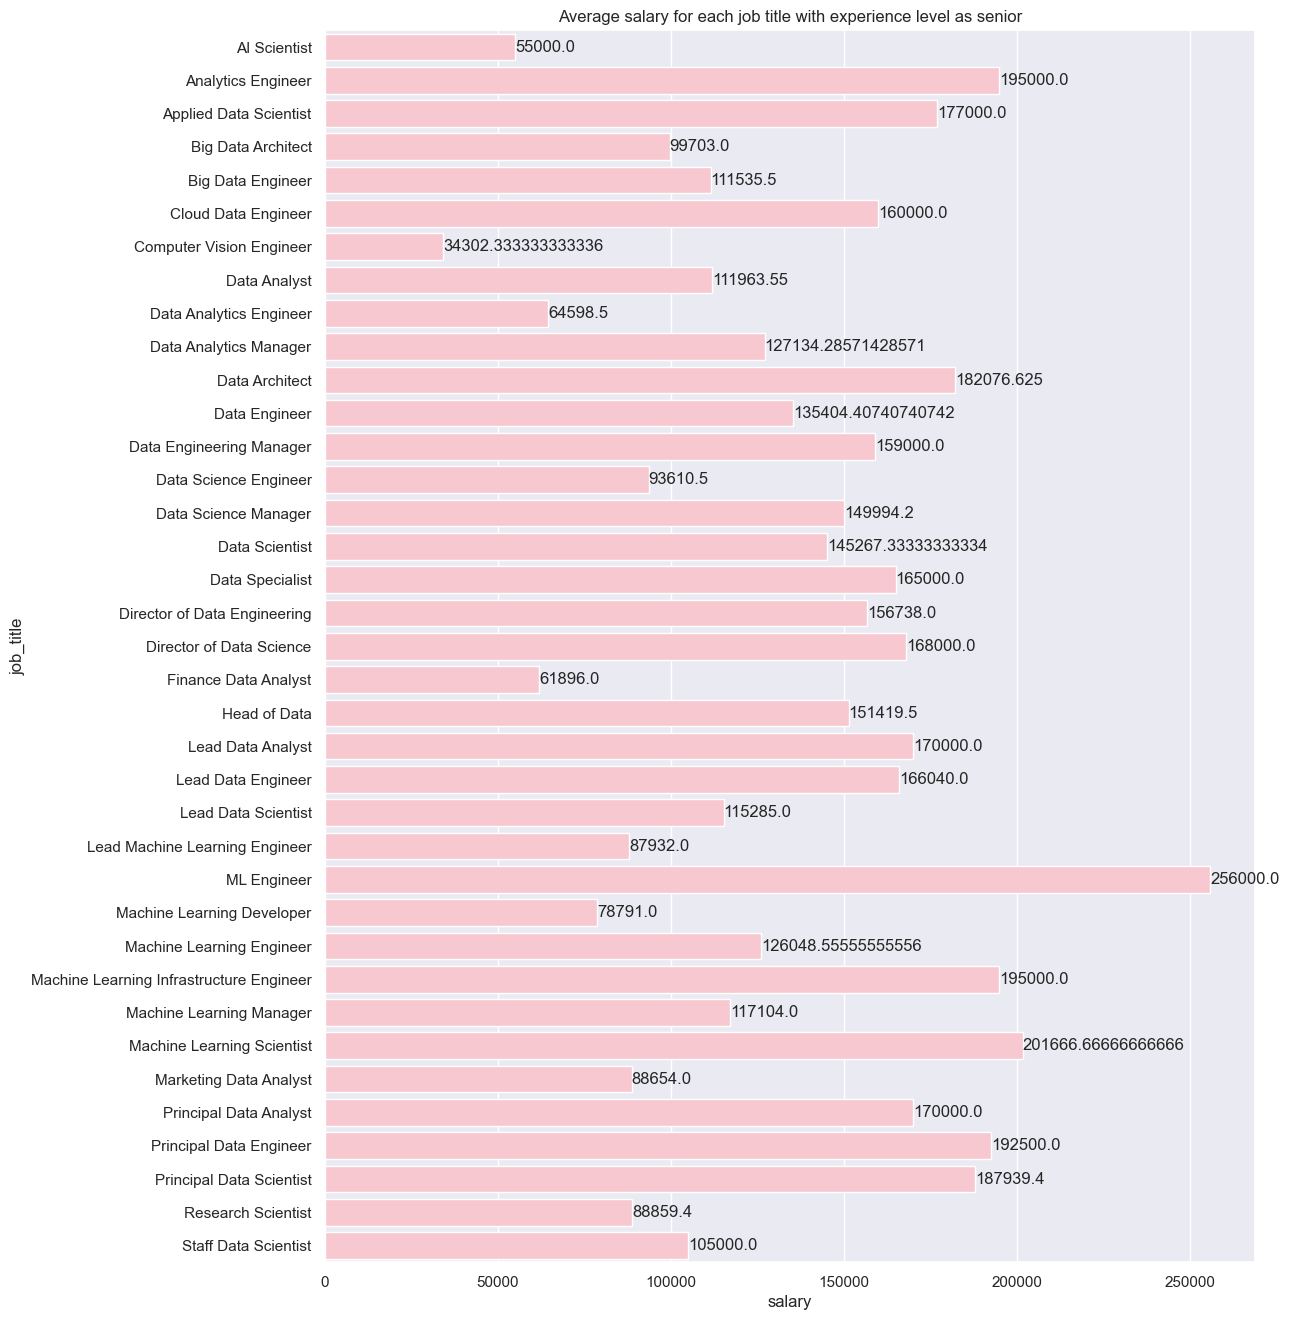

In [102]:
# Plot job titles working with experience level as senior
bar_plot('job_title',data_senior, "Average salary for each job title with experience level as senior")

At senior level, ML Engineer and Machine Learning Scientist are the highest earning jobs.

10. Has salary of data science job roles increased over the passing years?

In [103]:
data_year = data.groupby('work_year')['salary_in_usd'].mean()

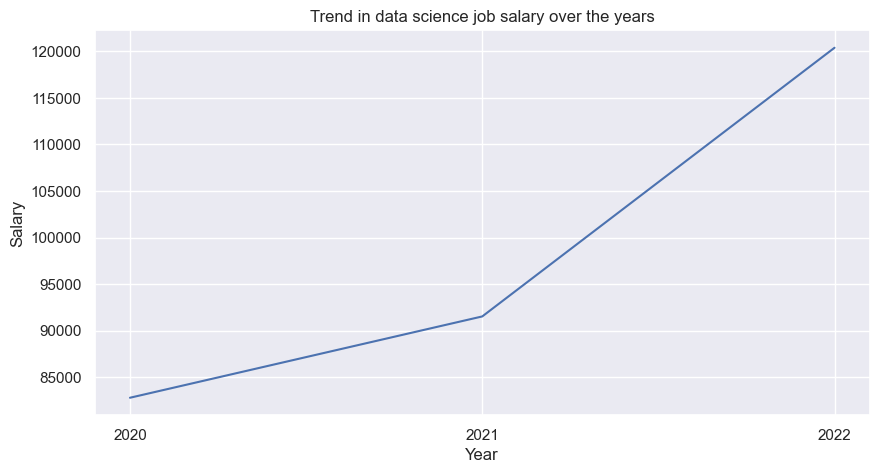

In [104]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=data_year.index,y=data_year.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years')
plt.show()

Data Science job salaries is increaing over the years.

11. What is the trend of salaries paid by medium size companies over the passing years?

In [105]:
data_M = data[data['company_size']=='Medium']
data_M_year = data_M.groupby('work_year')['salary_in_usd'].mean()

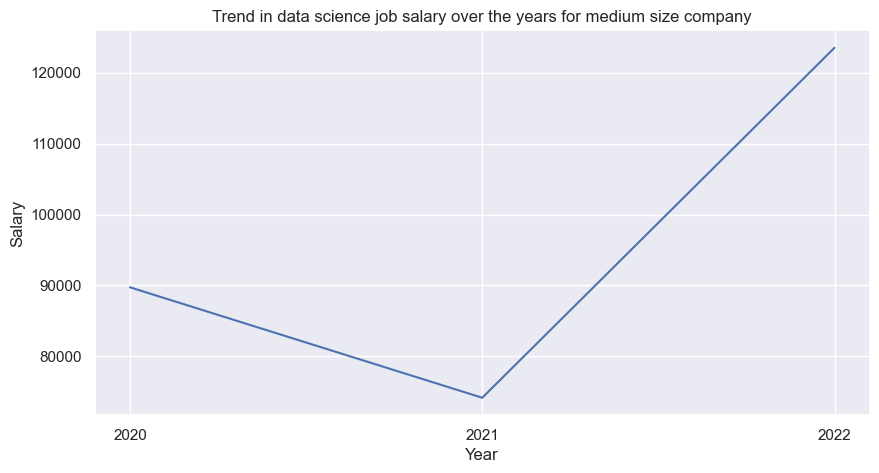

In [106]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=data_M_year.index,y=data_M_year.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years for medium size company')
plt.show()

Medium size companies paid less to the employees in 2021 than in 2020.

12. What is the trend of salaries paid by large size companies over the passing years?

In [107]:
data_L = data[data['company_size']=='Large']
data_L_year = data_L.groupby('work_year')['salary_in_usd'].mean()

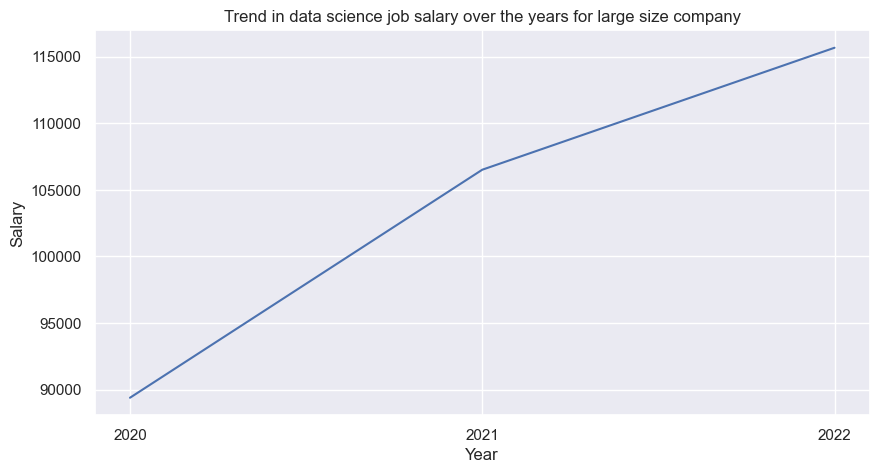

In [108]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=data_L_year.index,y=data_L_year.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years for large size company')
plt.show()

12. What is the trend of salaries paid by large size companies over the passing years?

In [109]:
data_S = data[data['company_size']=='Small']
data_S_year = data_S.groupby('work_year')['salary_in_usd'].mean()

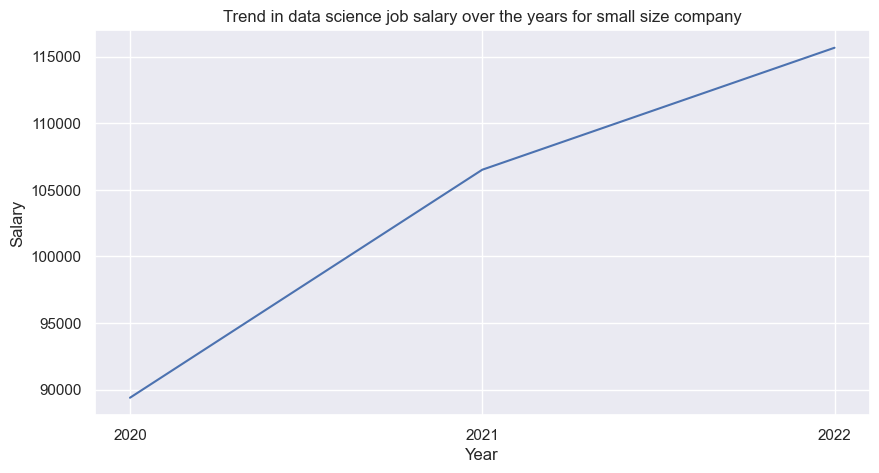

In [110]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=data_L_year.index,y=data_L_year.values)
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years for small size company')
plt.show()

# References

In [ ]:
BHATIA, R. (2022). Data Science Job Salaries. Available at: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download.

# Authors Message

If you find this helpful, I would really appreciate the upvote! If you see something wrong please let me know. And lastly I am happy to hear your thoughts about the notebook for me to also improve!